# LSTM When Normalizing Closing Prices

#### In this notebook I normalized only the closing prices and then broke it into train and test datasets. I kpet a simple lookback window to give all similar data same movement and put them in price points as inputs.

#### Lets see how we did:

In [2]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
import pandas as pd
from tensorflow.keras import Model
import tensorflow as tf
import tensorflow as keras

In [3]:
df2 = pd.read_csv('/Users/michaelrozenvasser/Capstone\JP_Morgan_Data.csv', header=0, parse_dates=[0])

In [4]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-03,26.311090,27.184005,26.272463,27.021782,44102800,0.00,0
1,2012-01-04,26.796150,27.348570,26.710567,27.192959,36571200,0.25,0
2,2012-01-05,27.006224,27.947668,26.765030,27.760937,38381400,0.00,0
3,2012-01-06,27.768700,27.830945,27.340771,27.511944,33160600,0.00,0
4,2012-01-09,27.574200,27.760934,27.224078,27.465273,23001800,0.00,0


In [5]:
import numpy as np

In [9]:
df_close = df2['Close']

In [10]:
df_close.shape

(2264,)

In [11]:
#Reshaping it
df_close = df_close.values.reshape(2264,1)

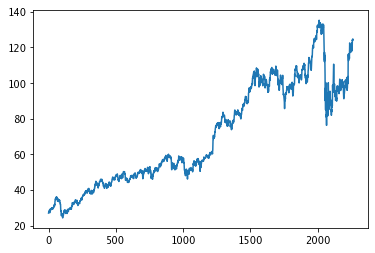

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

In [13]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1811 453


#### Normalize the values such that prices are reduced to normalized values and I can predict stock movement instead of actual prices

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
    dataX, dataY = [], []       #put this in data x
    for i in range(len(dataset)-look_back-1): #let dataY have only output values
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_shape=(None, 1),
    units = 50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

compilation time :  0.00528717041015625


In [18]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=80,
    validation_split=0.05)

Epoch 1/80
14/14 [==============================] - 3s 51ms/step - loss: 0.1049 - mae: 0.2576 - val_loss: 0.1779 - val_mae: 0.4207
Epoch 2/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0373 - mae: 0.1399 - val_loss: 0.0614 - val_mae: 0.2464
Epoch 3/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0197 - mae: 0.1148 - val_loss: 0.0372 - val_mae: 0.1918
Epoch 4/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0138 - mae: 0.0986 - val_loss: 0.0190 - val_mae: 0.1369
Epoch 5/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0694 - val_loss: 0.0052 - val_mae: 0.0709
Epoch 6/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0012 - val_mae: 0.0332
Epoch 7/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0014 - mae: 0.0275 - val_loss: 0.0017 - val_mae: 0.0392
Epoch 8/80
14/14 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0

Epoch 61/80
14/14 [==============================] - 0s 5ms/step - loss: 6.0083e-04 - mae: 0.0165 - val_loss: 5.8681e-04 - val_mae: 0.0219
Epoch 62/80
14/14 [==============================] - 0s 5ms/step - loss: 6.0883e-04 - mae: 0.0171 - val_loss: 3.8249e-04 - val_mae: 0.0168
Epoch 63/80
14/14 [==============================] - 0s 5ms/step - loss: 5.9950e-04 - mae: 0.0168 - val_loss: 1.2982e-04 - val_mae: 0.0085
Epoch 64/80
14/14 [==============================] - 0s 5ms/step - loss: 5.4478e-04 - mae: 0.0158 - val_loss: 1.3054e-04 - val_mae: 0.0085
Epoch 65/80
14/14 [==============================] - 0s 5ms/step - loss: 5.6531e-04 - mae: 0.0159 - val_loss: 5.6222e-04 - val_mae: 0.0212
Epoch 66/80
14/14 [==============================] - 0s 5ms/step - loss: 5.9889e-04 - mae: 0.0170 - val_loss: 1.3196e-04 - val_mae: 0.0087
Epoch 67/80
14/14 [==============================] - 0s 5ms/step - loss: 5.7778e-04 - mae: 0.0163 - val_loss: 4.8307e-04 - val_mae: 0.0196
Epoch 68/80
14/14 [========

#### we are getting a good mae but we need to see if it is overtrained so I wil run it on 40 epochs.

In [19]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40,
    validation_split=0.05)

Epoch 1/40
14/14 [==============================] - 0s 9ms/step - loss: 5.7665e-04 - mae: 0.0165 - val_loss: 8.1753e-04 - val_mae: 0.0265
Epoch 2/40
14/14 [==============================] - 0s 5ms/step - loss: 4.3680e-04 - mae: 0.0148 - val_loss: 6.3390e-04 - val_mae: 0.0228
Epoch 3/40
14/14 [==============================] - 0s 5ms/step - loss: 5.9030e-04 - mae: 0.0166 - val_loss: 2.6539e-04 - val_mae: 0.0137
Epoch 4/40
14/14 [==============================] - 0s 5ms/step - loss: 5.2507e-04 - mae: 0.0161 - val_loss: 1.3430e-04 - val_mae: 0.0087
Epoch 5/40
14/14 [==============================] - 0s 5ms/step - loss: 5.2378e-04 - mae: 0.0155 - val_loss: 1.3198e-04 - val_mae: 0.0087
Epoch 6/40
14/14 [==============================] - 0s 5ms/step - loss: 5.4129e-04 - mae: 0.0166 - val_loss: 1.2897e-04 - val_mae: 0.0085
Epoch 7/40
14/14 [==============================] - 0s 5ms/step - loss: 5.2010e-04 - mae: 0.0157 - val_loss: 4.9121e-04 - val_mae: 0.0198
Epoch 8/40
14/14 [================

### Final Predictions

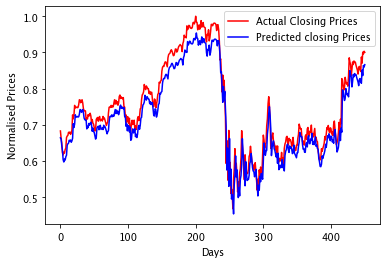

In [19]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

In [20]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 [==============================] - 0s 1ms/step - loss: 2.5486e-04 - mae: 0.0136


#### As we can tell the LSTM works great to predict closing prices when we normalize the prices and predict the stock price movement.